# Semana 3_Ejercicios_Navegación Autónoma


## Importar Librerias

In [1]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Importar Recursos

Load Video

In [2]:
# Create a VideoCapture object and open the video file
cap = cv2.VideoCapture('video_tgu.mp4')

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Loop through the frames of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # If the frame was not read successfully, break out of the loop
    if not ret:
        break

    # Do some processing on the frame, if desired
    # ...

    # Display the frame
    cv2.imshow('Frame', frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close the window
cap.release()
cv2.destroyAllWindows()


(1920, 1080)


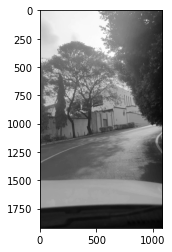

In [3]:
#se corrige el orden de los planos de color
#se obtiene la imagen en escala de grises y se muestra como arreglo
img_bgr = frame
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_arr = np.asarray(img)
plt.imshow(img_arr, cmap='gray')
print(img_arr.shape)

In [4]:
img_arr.shape

(1920, 1080)

## Creacion de ROI 

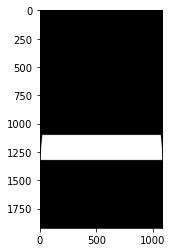

In [5]:
# ROI arbitraria
vertices = np.array([[(0,1320),(20, 1100), (1060, 1100), (1080,1320)]], dtype=np.int32)    
# imagen en negro de las mismas dimensiones que la imagen original en escala de grises
roi_img = np.zeros_like(img)
# la ROI se pinta de blanco sobre la imagen en negro
cv2.fillPoly(roi_img, vertices, 255)
plt.imshow(roi_img, cmap='gray')

## Operacion AND entre ROI e imagen 

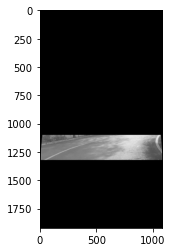

In [6]:
img_con_roi = cv2.bitwise_and(img, roi_img)
plt.imshow(img_con_roi, cmap='gray')

## Creacion de imagen Canny 

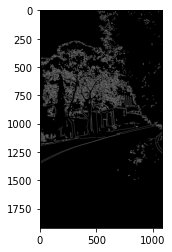

In [7]:

img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_blur = cv2.GaussianBlur(img_grey,(3,3), 0, 0)
img_canny = cv2.Canny(img_blur, 40, 120) 
plt.imshow(img_canny, cmap='gray')

In [8]:
img_canny.shape

(1920, 1080)

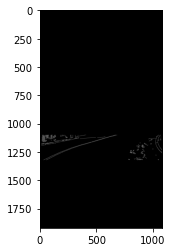

In [9]:
# Aplicacion de ROI a imagen Canny
img_roi = np.zeros_like(img_grey)
cv2.fillPoly(img_roi, vertices, 255)
img_mask = cv2.bitwise_and(img_canny, img_roi)
plt.imshow(img_mask, cmap='gray')

## Aplicacion de Transformada de Hough 

In [10]:
rho = 2            # resolución de rho en pixeles
theta = np.pi/180  # resolución de theta en radianes 
threshold = 40     # mínimo número de votos para ser considerado una línea 
min_line_len = 50  # mínimo número de pixeles para que se forme una línea
max_line_gap = 10  # máximo espacio en pixeles entre segmentos de línea    

lines = cv2.HoughLinesP(img_mask, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

# se crea un fondo negro del tamaño de la imagen con bordes
img_lines = np.zeros((img_mask.shape[0], img_mask.shape[1], 3), dtype=np.uint8)

# se dibujan cada una de las líneas sobre la imagen con fondo negro    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 30)

        # se imprimen las líneas encontradas
#print(lines)

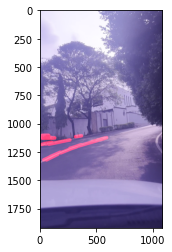

In [11]:
alpha = 1
beta = 1
gamma = 1
img_lane_lines = cv2.addWeighted(img_rgb, alpha, img_lines, beta, gamma)
plt.imshow(img_lane_lines)

## Aplicacion de Deteccion de Lineas en Video 

In [12]:
# Create a VideoCapture object and open the video file
cap = cv2.VideoCapture('video_tgu.mp4')

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Loop through the frames of the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # If the frame was not read successfully, break out of the loop
    if not ret:
        break

    # Do some processing on the frame, if desired
    # Aplicacion de ROI a imagen Canny
    
    # 1 - se obtiene la imagen en escala de grises y se muestra como arreglo
    img_bgr = frame
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_arr = np.asarray(img)
    
    # 2 - Imagen Canny
    img_grey = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_blur = cv2.GaussianBlur(img_grey,(3,3), 0, 0)
    img_canny = cv2.Canny(img_blur, 40, 120) 
    
    # 3 - Aplicacion de ROI a imagen Canny
    img_roi = np.zeros_like(img_grey)
    cv2.fillPoly(img_roi, vertices, 255)
    img_mask = cv2.bitwise_and(img_canny, img_roi)
    
    # 4 - Aplicacion Transformada de Hough
    lines = cv2.HoughLinesP(img_mask, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

    # se crea un fondo negro del tamaño de la imagen con bordes
    img_lines = np.zeros((img_mask.shape[0], img_mask.shape[1], 3), dtype=np.uint8)

    # se dibujan cada una de las líneas sobre la imagen con fondo negro    
    for line in lines:
        for x1,y1,x2,y2 in line:      
            cv2.line(img_lines, (x1, y1), (x2, y2), [255, 0, 0], 30)
            
    img_lane_lines = cv2.addWeighted(img_rgb, alpha, img_lines, beta, gamma)

    # Display the frame
    cv2.imshow('Frame', img_lane_lines)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the VideoCapture object and close the window
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not iterable

## Referencias 